# (1) Install Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (2) Load BindingDB dataset

In [3]:
raw_data = pd.read_csv('/home/messy92/Leo/Drug-discovery-research/data/BindingDB_BindingDB_Inhibition (prep).csv')


In [4]:
raw_data

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),PubChem CID,ZINC ID of Ligand,Number of Protein Chains in Target (>1 implies a multichain complex),BindingDB Target Chain Sequence,PDB ID(s) of Target Chain,UniProt (SwissProt) Recommended Name of Target Chain
0,455059,ONC(=O)CCCCn1cc(C(=O)Nc2ccccc2)c(=O)c2ccccc12,Quinolone-based HDAC inhibitor 4a,Histone acetylases (HDACs),Homo sapiens,NaN,32.0,NaN,NaN,131953857.0,ZINC33410638,5,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,"3MAX,4BKX,5ICN,6Z2J,6Z2K",Histone deacetylase 1
1,455061,COc1ccc(NC(=O)c2cn(CCCCC(=O)NO)c3ccccc3c2=O)cc1,Quinolone-based HDAC inhibitor 4c,Histone acetylases (HDACs),Homo sapiens,NaN,39.0,NaN,NaN,131953859.0,ZINC04863960,5,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,"3MAX,4BKX,5ICN,6Z2J,6Z2K",Histone deacetylase 1
2,455065,ONC(=O)CCCCn1cc(C(=O)Nc2ccncc2)c(=O)c2ccccc12,Quinolone-based HDAC inhibitor 4g,Histone acetylases (HDACs),Homo sapiens,NaN,90.0,NaN,NaN,131953863.0,ZINC00164363,5,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,"3MAX,4BKX,5ICN,6Z2J,6Z2K",Histone deacetylase 1
3,455066,ONC(=O)CCCCn1cc(C(=O)Nc2nccs2)c(=O)c2ccccc12,Quinolone-based HDAC inhibitor 4h,Histone acetylases (HDACs),Homo sapiens,NaN,42.0,NaN,NaN,131953864.0,ZINC02686872,5,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,"3MAX,4BKX,5ICN,6Z2J,6Z2K",Histone deacetylase 1
4,455067,Cc1csc(NC(=O)c2cn(CCCCC(=O)NO)c3ccccc3c2=O)n1,Quinolone-based HDAC inhibitor 4i,Histone acetylases (HDACs),Homo sapiens,NaN,0.0,NaN,NaN,131953865.0,ZINC03257684,5,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,"3MAX,4BKX,5ICN,6Z2J,6Z2K",Histone deacetylase 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16881,868736,CCCC(C(CC(C)C)C(=O)NC(CCCCNC(=O)OCc1ccccc1)C(=...,"med.21724, Compound 10",Angiotensin-converting enzyme 2,Homo sapiens,NaN,1.0,NaN,NaN,NaN,NaN,1,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...,"1R42,1R4L,2AJF,3KBH,6LZG,6VW1",Angiotensin-converting enzyme 2
16882,868739,CC(C)CC(NC(Cc1cncn1Cc1cc(Cl)cc(Cl)c1)C(O)=O)C(...,"med.21724, Compound 13",Angiotensin-converting enzyme 2,Homo sapiens,NaN,0.0,NaN,NaN,NaN,NaN,1,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...,"1R42,1R4L,2AJF,3KBH,6LZG,6VW1",Angiotensin-converting enzyme 2
16883,868747,CC(C)C(NC(=O)OCc1ccccc1)C(=O)NC(Cc1ccccc1)C=O,MDL28170::Z-Val-Phe-CHO::benzyl N-[(1S)-2-meth...,Cathepsin (L and K),Homo sapiens,NaN,3.0,NaN,NaN,9907994.0,ZINC08584799,1,MNPTLILAAFCLGIASATLTFDHSLEAQWTKWKAMHNRLYGMNEEG...,"1ICF,1MHW,2VHS,2XU3,2XU4,2XU5,2YJ2,2YJ8,2YJ9,2...",Procathepsin L
16884,868749,CCc1ccccc1NC(=O)CSC(=O)NNC(=O)C(Cc1c[nH]c2cccc...,"med.21724, Compound 21",Cathepsin (L and K),Homo sapiens,NaN,7.0,NaN,NaN,NaN,NaN,1,MNPTLILAAFCLGIASATLTFDHSLEAQWTKWKAMHNRLYGMNEEG...,"1ICF,1MHW,2VHS,2XU3,2XU4,2XU5,2YJ2,2YJ8,2YJ9,2...",Procathepsin L


# (3) 전처리하기
## (3-1) 일부 변수들만 뽑아주기
BindingDB에 포함된 모든 변수를 사용해 줄 필요는 없다. 오히려 일부 변수들은 동일한 정보를 다르게 표현하고 있을 뿐인 경우도 많다.

Target-Drug Translation 문제를 풀기 위해 필수적인 변수는 다음과 같다.

* 표적 단백질 시퀀스 (Target Chaing Sequence)
* 리간드 시퀀스 (Ligand SMILES)
* 단백질 - 리간드 반응 변수 (ex., Ki, IC50, Kd, EC50 etc.)

그 외 변수들은 선택사항으로 자유롭게 추가한다.

본 연구에선 기존 15개 변수들 중 아래와 같이 6개 변수들만을 선택하였다.

```python
raw_data = raw_data.loc[:, ['Ligand SMILES', 'BindingDB Target Chain Sequence', 'Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']]
```

이때 각 변수들의 의미는 다음과 같다.

- **Ligand SMILES** : Target Protein에 반응한다고 알려진 리간드 화합물을 SMILES로 표현한 값 (시퀀스)
- **Binding DB Target Chain Sequence** : Target Protein의 아미노산 염기서열 (amino acids sequence) (시퀀스)
- **Ki (nM)**
- **IC50 (nM)**
- **Kd (nM)**
- **EC50 (nM)**



In [5]:
sample_data = raw_data.loc[:, ['Ligand SMILES', 'BindingDB Target Chain Sequence', 'Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']]
sample_data


,Ligand SMILES,BindingDB Target Chain Sequence,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM)
0,ONC(=O)CCCCn1cc(C(=O)Nc2ccccc2)c(=O)c2ccccc12,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,NaN,32.0,NaN,NaN
1,COc1ccc(NC(=O)c2cn(CCCCC(=O)NO)c3ccccc3c2=O)cc1,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,NaN,39.0,NaN,NaN
2,ONC(=O)CCCCn1cc(C(=O)Nc2ccncc2)c(=O)c2ccccc12,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,NaN,90.0,NaN,NaN
3,ONC(=O)CCCCn1cc(C(=O)Nc2nccs2)c(=O)c2ccccc12,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,NaN,42.0,NaN,NaN
4,Cc1csc(NC(=O)c2cn(CCCCC(=O)NO)c3ccccc3c2=O)n1,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYG...,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...
16881,CCCC(C(CC(C)C)C(=O)NC(CCCCNC(=O)OCc1ccccc1)C(=...,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...,NaN,1.0,NaN,NaN
16882,CC(C)CC(NC(Cc1cncn1Cc1cc(Cl)cc(Cl)c1)C(O)=O)C(...,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...,NaN,0.0,NaN,NaN
16883,CC(C)C(NC(=O)OCc1ccccc1)C(=O)NC(Cc1ccccc1)C=O,MNPTLILAAFCLGIASATLTFDHSLEAQWTKWKAMHNRLYGMNEEG...,NaN,3.0,NaN,NaN
16884,CCc1ccccc1NC(=O)CSC(=O)NNC(=O)C(Cc1c[nH]c2cccc...,MNPTLILAAFCLGIASATLTFDHSLEAQWTKWKAMHNRLYGMNEEG...,NaN,7.0,NaN,NaN


## (3-2) 객체 타입 확인하기

In [13]:
# 객체 타입 알아보기
print(sample_data.dtypes)

Ligand SMILES                       object
BindingDB Target Chain Sequence     object
Ki (nM)                            float64
IC50 (nM)                          float64
Kd (nM)                            float64
EC50 (nM)                          float64
dtype: object


## (3-3)  Protein amino acids sequence 및 Ligand SMILES sequence의 길이분포 확인

In [113]:
# 단백질과 화합물의 시퀀스 길이 분포 추출
protein_len_distribution = raw_data.apply(lambda x : len(x['BindingDB Target Chain Sequence']), axis = 1)
compound_len_distribution = raw_data.apply(lambda x : len(x['Ligand SMILES']), axis = 1)

# 단백질의 경우 소수의 너무 긴 단백질이 존재하므로 길이 하위 80% 까지만 고려.
#protein_q20 = protein_len_distribution.quantile(0.2)
protein_q80 = protein_len_distribution.quantile(0.8)
truncated_protein_len_distribution = protein_len_distribution[protein_len_distribution.lt(protein_q80)]

In [124]:
protein_len_data = pd.concat([pd.Series(np.repeat("protein", len(truncated_protein_len_distribution))), truncated_protein_len_distribution], axis = 1)
compound_len_data = pd.concat([pd.Series(np.repeat("compound", len(compound_len_distribution))), compound_len_distribution], axis = 1)

sequence_len_dist_data = pd.concat([protein_len_data, compound_len_data], axis = 0)
sequence_len_dist_data.columns = ['sequence', 'length']

In [125]:
sequence_len_dist_data

,sequence,length
0,protein,482.0
1,protein,482.0
2,protein,482.0
3,protein,482.0
4,protein,482.0
...,...,...
16881,compound,64.0
16882,compound,50.0
16883,compound,45.0
16884,compound,65.0


/home/messy92/.conda/envs/unist_server/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


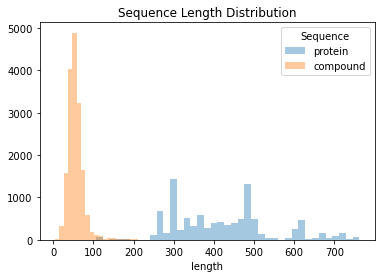

In [130]:
sns.distplot(sequence_len_dist_data[sequence_len_dist_data.sequence == "protein"]['length'], label = "protein", kde = False)
sns.distplot(sequence_len_dist_data[sequence_len_dist_data.sequence == "compound"]['length'], label = "compound", kde = False)
plt.legend(title = 'Sequence')
plt.title('Sequence Length Distribution')
plt.show()

In [139]:
print(raw_data2.dtypes)

Ligand SMILES                                                           object
BindingDB Ligand Name                                                   object
BindingDB Target Chain  Sequence                                        object
Ki (nM)                                                                 object
IC50 (nM)                                                               object
Kd (nM)                                                                 object
EC50 (nM)                                                               object
kon (M-1-s-1)                                                           object
koff (s-1)                                                              object
pH                                                                      object
Temp (C)                                                                object
Curation/DataSource                                                     object
Number of Protein Chains in Target (>1 implies a mul

## (3-2) 분석

In [123]:
raw_data.loc[:, 'BindingDB Target Chain  Sequence']

0        MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
1        MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
2        MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
3        MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
4        MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
                               ...                        
84139    MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
84140    MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
84141    MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
84142    MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
84143    MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
Name: BindingDB Target Chain  Sequence, Length: 84144, dtype: object

In [72]:
test_dat = raw_data.loc[:, ['IC50 (nM)', 'EC50 (nM)']].fillna(0)
xvals_list = list(range(test_dat.shape[0]))
sns.set(style = 'darkgrid')
fig = sns.kdeplot(test_dat['IC50 (nM)'], shade = True, color = 'r')
fig = sns.kdeplot(test_dat['EC50 (nM)'], shade = True, color = 'b')
plot.show()


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

In [80]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")b

In [99]:
test_dat.astype('float')

ValueError: could not convert string to float: '>1000000'

array([    0,     1,     2, ..., 84131, 84132, 84133])

# (3) Exploratory Data Analysis (EDA)

In [14]:
raw_data.shape

(84144, 91)

In [15]:
raw_data

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,9825,COc1cc2c(Nc3ccc(Cl)cc3Cl)c(cnc2cc1OCCCN1CCN(C)...,InChI=1S/C25H27Cl2N5O2/c1-31-7-9-32(10-8-31)6-...,MVQUQGLRQPMJPU-UHFFFAOYSA-N,4521,3-quinolinecarbonitrile 3::4-Phenylamino-3-qui...,Proto-oncogene tyrosine-protein kinase Src,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9826,COc1cc2c(Nc3cc(OC)c(OC)c(OC)c3)c(cnc2cc1OCCCN1...,InChI=1S/C28H35N5O5/c1-32-8-10-33(11-9-32)7-6-...,VOUVVBUKNLBXGS-UHFFFAOYSA-N,6121,3-quinolinecarbonitrile 4::6-methoxy-7-[3-(4-m...,Proto-oncogene tyrosine-protein kinase Src,NaN,NaN,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9827,COCCOc1cc2ncc(C#N)c(Nc3cc(OC)c(Cl)cc3Cl)c2cc1O...,InChI=1S/C23H23Cl2N3O5/c1-29-4-6-32-21-8-15-18...,VXEOIAFZWQMOEP-UHFFFAOYSA-N,6122,"3-quinolinecarbonitrile 8::4-[(2,4-dichloro-5-...",Proto-oncogene tyrosine-protein kinase Src,NaN,NaN,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9828,COCCOc1cc2ncc(C#N)c(Nc3ccc(Cl)cc3Cl)c2cc1OCCOC,InChI=1S/C22H21Cl2N3O4/c1-28-5-7-30-20-10-16-1...,DTLASHUZTAPRBX-UHFFFAOYSA-N,6123,"3-quinolinecarbonitrile 9::4-[(2,4-dichlorophe...",Proto-oncogene tyrosine-protein kinase Src,NaN,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9829,COCCOc1cc2ncc(C#N)c(Nc3cc(OC)c(OC)c(OC)c3)c2cc...,InChI=1S/C25H29N3O7/c1-29-6-8-34-20-12-18-19(1...,BTBPPLGKNLXRGR-UHFFFAOYSA-N,6124,"3-quinolinecarbonitrile 10::6,7-bis(2-methoxye...",Proto-oncogene tyrosine-protein kinase Src,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84139,917938,Clc1cc(OCc2ccccc2Cl)cc(c1)C1C=C(C(=O)N(C1=O)c1...,NaN,NaN,448369,"Perampanel, 21",Replicase polyprotein 1ab,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84140,917939,Fc1c(Cl)cc(cc1OCc1ccccc1Cl)C1C=C(C(=O)N(C1=O)c...,NaN,NaN,448371,"Perampanel, 23",Replicase polyprotein 1ab,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84141,917940,Clc1cc(OCC2CC2)cc(c1)C1C=C(C(=O)N(C1=O)c1cccnc...,InChI=1S/C27H20ClN3O3/c28-20-10-19(11-22(12-20...,CEKSDTLWJAPAJY-UHFFFAOYSA-N,448374,"Perampanel, 26",Replicase polyprotein 1ab,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84142,917941,Clc1cc(OCC2CC2)cc(c1)C1C=C(C(=O)N(C1=O)c1cccnc...,InChI=1S/C27H20ClN3O3/c28-20-10-19(11-22(12-20...,CEKSDTLWJAPAJY-UHFFFAOYSA-N,448374,"Perampanel, 26",Replicase polyprotein 1ab,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
